In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import fashion_mnist
from keras.utils import plot_model, to_categorical

In [25]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

In [26]:
# building a validation set
train_size = int(x_train_and_val.shape[0] * 0.7)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

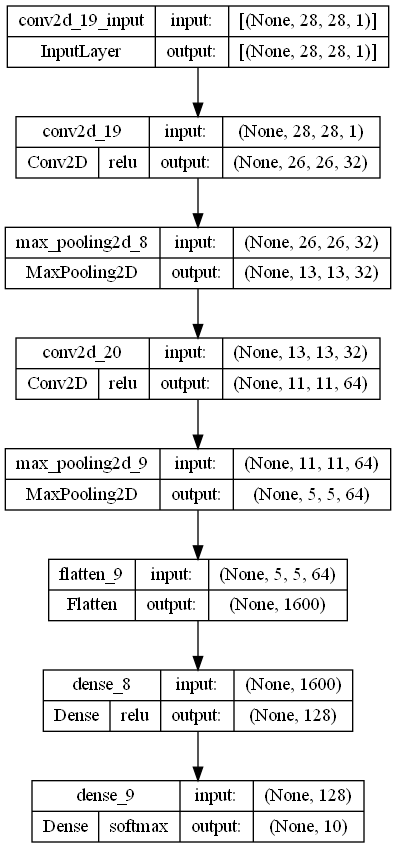

In [27]:
# Baseline model
## input -> convolutional 32 -> Pooling -> Convolutional 64 -> Pooling -> Fully connected layer 128 -> output

img_width = 28
img_height = 28
num_classes = 10

# Initialize the model
model = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height)))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer with a 0.5 dropout rate
# model.add(Dropout(0.5))

# Add the output layer with a softmax activation function for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True)



In [28]:

y_train.shape, x_train.shape

((42000, 10), (42000, 28, 28))

In [29]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1313/1313 [==============================] - 31s 22ms/step - loss: 0.4819 - accuracy: 0.8240
Epoch 2/15
1313/1313 [==============================] - 29s 22ms/step - loss: 0.3172 - accuracy: 0.8846
Epoch 3/15
1313/1313 [==============================] - 28s 21ms/step - loss: 0.2682 - accuracy: 0.9008
Epoch 4/15
1313/1313 [==============================] - 30s 23ms/step - loss: 0.2329 - accuracy: 0.9139
Epoch 5/15
1313/1313 [==============================] - 28s 21ms/step - loss: 0.2052 - accuracy: 0.9241
Epoch 6/15
1313/1313 [==============================] - 28s 21ms/step - loss: 0.1832 - accuracy: 0.9320
Epoch 7/15
1313/1313 [==============================] - 27s 20ms/step - loss: 0.1604 - accuracy: 0.9402
Epoch 8/15
1313/1313 [==============================] - 27s 20ms/step - loss: 0.1417 - accuracy: 0.9465
Epoch 9/15
1313/1313 [==============================] - 28s 21ms/step - loss: 0.1235 - accuracy: 0.9542
Epoch 10/15
1313/1313 [==============================] - 28s 21m

In [ ]:
y_train

array([9, 0, 0, ..., 5, 9, 7], dtype=uint8)